# House price prediction

##Importing libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

##Mounting Gooogle Drive

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading the dataset

In [96]:
df=pd.read_csv('/content/drive/MyDrive/House price prediction -Trish/House_price_prediction/Bengaluru_House_Data.csv')

FileNotFoundError: ignored

In [14]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [15]:
df.shape

(13320, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


##Data pre-processing

###Checking for null values

In [17]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

###Checking for unique values

In [18]:
for columns in df.columns:
  print(columns)
  print("-"*50)
  print(df[columns].value_counts())
  print("-"*50)

area_type
--------------------------------------------------
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------------------------
availability
--------------------------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
--------------------------------------------------
location
--------------------------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st

###Dropping the column with many missing values.

In [19]:
df.drop(columns=['society'],inplace=True)

###Removing null values

In [20]:
df=df.dropna(how='any',axis=0)

In [21]:
df.describe()

,bath,balcony,price
count,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778
std,1.226000,0.817287,131.766089
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.030000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [23]:
df['bhk'] = df['size'].str.split().str.get(0).astype(float) 

### Checking for outliers.

In [24]:
df.describe()

,bath,balcony,price,bhk
count,12710.000000,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778,2.737136
std,1.226000,0.817287,131.766089,1.205097
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,49.030000,2.000000
50%,2.000000,2.000000,70.000000,3.000000
75%,3.000000,2.000000,115.000000,3.000000
max,40.000000,3.000000,2912.000000,43.000000


In [25]:
df[df.bhk>20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27.0
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43.0


### Checking the range of total_sqft column

In [26]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## Creating a function to deal with the ranges given in some cells in total_sqft column

In [27]:
def convt_range(x):
  temp=x.split('-')
  if len(temp)==2:
    return(float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
#for columns in df.columns:
  #tempo=columns.str.split().str.get(0).astype(float)
  #print(cont_range(columns))
#df['tsq'] = df['total_sqft'].str.split().str.get(0).astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
 8   bhk           12710 non-null  float64
dtypes: float64(4), object(5)
memory usage: 993.0+ KB


In [29]:
df['total_sqft'] = df['total_sqft'].apply(convt_range)

In [30]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [31]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [32]:
df.drop(columns=['area_type','availability'],inplace=True)

In [33]:
df.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0


### Plotting a heat map.

<ipython-input-34-14aa5d1087bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

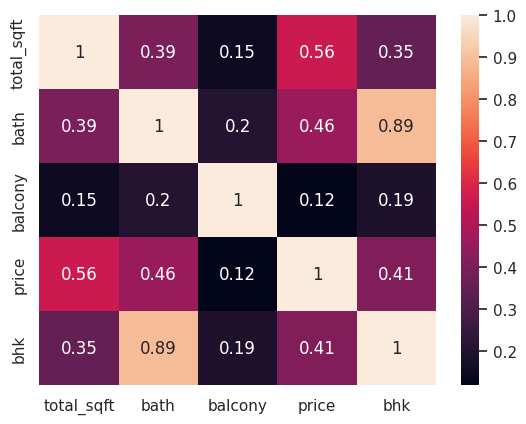

In [34]:
correlation=df.corr()
sb.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [35]:
#def unique_disp(i):
  #df[i].unique()
#print(unique_disp(i for i in ['bath','balcony','bhk']) )

df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [36]:
df['balcony'].unique()

array([1., 3., 2., 0.])

In [37]:
df['bhk'].unique()

array([ 2.,  4.,  3.,  1.,  6.,  8.,  7.,  5., 11.,  9., 27., 43., 14.,
       12., 10., 13.])

### bath and bhk are highly correlated. Thus we need to drop one of them

In [38]:
df.drop(columns=['bath'],inplace=True)

In [39]:
df.head()

,location,size,total_sqft,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,1.0,51.00,2.0


### Calculating the price per square feet

In [40]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [41]:
df.head()

,location,size,total_sqft,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,1.0,51.00,2.0,4250.000000


In [42]:
df.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12668.000000,12710.000000,12710.000000,12710.000000,1.266800e+04
mean,1511.835167,1.584343,106.060778,2.737136,6.876277e+03
std,1162.097276,0.817287,131.766089,1.205097,2.263354e+04
min,5.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,1.000000,49.030000,2.000000,4.242721e+03
50%,1260.000000,2.000000,70.000000,3.000000,5.376344e+03
75%,1640.000000,2.000000,115.000000,3.000000,7.142857e+03
max,52272.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [44]:
df['location']=df['location'].apply(lambda x:x.strip())
location_count=df['location'].value_counts()

location_count

Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: location, Length: 1254, dtype: int64

In [45]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

Kalkere                  10
Kodigehalli              10
Ganga Nagar              10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Shirdi Sai Nagar          1
S R Layout                1
Meenakshi Layout          1
Vidyapeeta                1
Abshot Layout             1
Name: location, Length: 1017, dtype: int64

In [46]:
df['location']=df['location'].apply(lambda x:'other' if x in location_count_less_10 else x)

df['location'].value_counts()

other                        2739
Whitefield                    515
Sarjapur  Road                372
Electronic City               302
Kanakpura Road                261
                             ... 
Marsur                         11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
ISRO Layout                    11
Vishveshwarya Layout           11
Name: location, Length: 238, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12710 non-null  object 
 1   size            12710 non-null  object 
 2   total_sqft      12668 non-null  float64
 3   balcony         12710 non-null  float64
 4   price           12710 non-null  float64
 5   bhk             12710 non-null  float64
 6   price_per_sqft  12668 non-null  float64
dtypes: float64(5), object(2)
memory usage: 794.4+ KB


In [48]:
df=df[(df['total_sqft']/df['bhk'])>=300]

df.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12013.000000,12013.000000,12013.000000,12013.000000,12013.000000
mean,1542.315982,1.587613,105.003648,2.607259,6206.082347
std,1181.094228,0.808867,134.205666,0.922985,3985.518807
min,300.000000,0.000000,9.000000,1.000000,267.829813
25%,1107.000000,1.000000,48.450000,2.000000,4199.363057
50%,1285.000000,2.000000,68.000000,2.000000,5252.525253
75%,1660.000000,2.000000,110.000000,3.000000,6823.529412
max,52272.000000,3.000000,2912.000000,13.000000,176470.588235


In [49]:
df.shape

(12013, 7)

### Removing outliers using the 99% method

In [50]:
q=df['price_per_sqft'].quantile(0.99)
df_1=df[df['price_per_sqft']<q]
df_1.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,11892.000000,11892.000000,11892.000000,11892.000000,11892.000000
mean,1529.214625,1.586865,98.261674,2.593508,5977.170607
std,1162.286734,0.807795,102.325976,0.907505,2868.665800
min,300.000000,0.000000,9.000000,1.000000,267.829813
25%,1105.000000,1.000000,48.000000,2.000000,4189.636163
50%,1280.000000,2.000000,68.000000,2.000000,5233.569612
75%,1650.000000,2.000000,110.000000,3.000000,6760.563380
max,52272.000000,3.000000,2200.000000,13.000000,20645.161290


In [51]:
df_1.bhk.describe()

count    11892.000000
mean         2.593508
std          0.907505
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bhk, dtype: float64

In [52]:
df_1.head()

,location,size,total_sqft,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,1.0,51.00,2.0,4250.000000


### Creating a function to remove the bhk column outliers.

In [53]:
def bhk_outliers(y):
  exclude_indices=np.array([1])  #creating an empty array which will carry all the values needed
  for location, location_y in y.groupby('location'):
    bhk_stats={}
    for bhk, bhk_y in location_y.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_y.price_per_sqft),
          'std':np.std(bhk_y.price_per_sqft),
          'count':bhk_y.shape[0] #number of unique values
      }

    for bhk,bhk_y in location_y.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5: #checking fot the threshold no. of data points to get an accurate mean
        exclude_indices-np.append(exclude_indices,bhk_y[bhk_y.price_per_sqft<(stats['mean'])].index.values)
  return y.drop(exclude_indices, axis='index')

In [54]:
bhk_outliers(df_1)
df_1.shape

(11892, 7)

In [55]:
df_1.head()

,location,size,total_sqft,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,1.0,51.00,2.0,4250.000000


In [56]:
df_1.drop(columns=['size'],inplace=True)

<ipython-input-56-bb67eb9cc3cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns=['size'],inplace=True)


In [57]:
df_1.shape

(11892, 6)

In [58]:
df_1.info

<bound method DataFrame.info of                        location  total_sqft  balcony   price  bhk  \
0      Electronic City Phase II      1056.0      1.0   39.07  2.0   
1              Chikka Tirupathi      2600.0      3.0  120.00  4.0   
2                   Uttarahalli      1440.0      3.0   62.00  3.0   
3            Lingadheeranahalli      1521.0      1.0   95.00  3.0   
4                      Kothanur      1200.0      1.0   51.00  2.0   
...                         ...         ...      ...     ...  ...   
13314         Green Glen Layout      1715.0      3.0  112.00  3.0   
13315                Whitefield      3453.0      0.0  231.00  5.0   
13317     Raja Rajeshwari Nagar      1141.0      1.0   60.00  2.0   
13318           Padmanabhanagar      4689.0      1.0  488.00  4.0   
13319              Doddathoguru       550.0      1.0   17.00  1.0   

       price_per_sqft  
0         3699.810606  
1         4615.384615  
2         4305.555556  
3         6245.890861  
4         4250.0000

In [59]:
df_1.to_csv("Cleaned_data.csv")

In [60]:
p=df_1.drop(columns=['price']) #independent features
q=df_1['price'] #features which we are predicting through the model

In [61]:
p.head()

,location,total_sqft,balcony,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,1.0,2.0,3699.810606
1,Chikka Tirupathi,2600.0,3.0,4.0,4615.384615
2,Uttarahalli,1440.0,3.0,3.0,4305.555556
3,Lingadheeranahalli,1521.0,1.0,3.0,6245.890861
4,Kothanur,1200.0,1.0,2.0,4250.000000


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [63]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.2,random_state=0)

In [64]:
print(p_train.shape)
print(q_train.shape)

(9513, 5)
(9513,)


## Model_1:Linear Regression

In [65]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [66]:
scaler=StandardScaler()

In [67]:
lr=LinearRegression()

In [68]:
pipe=make_pipeline(column_trans,scaler,lr)

In [69]:
pipe.fit(p_train,q_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [70]:
q_pred_lr=pipe.predict(p_test)

In [71]:
r2_score(q_test,q_pred_lr)

0.7599670933190811

## Model_2: Lasso


In [72]:
lasso=Lasso()

In [73]:
pipe=make_pipeline(column_trans,scaler,lasso)

In [74]:
pipe.fit(p_train,q_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [75]:
q_pred_lasso=pipe.predict(p_test)

In [76]:
r2_score(q_test,q_pred_lasso)

0.760370366208372

## Model_3: Ridge

In [77]:
ridge=Ridge()

In [78]:
pipe=make_pipeline(column_trans,scaler,ridge)

In [79]:
pipe.fit(p_train,q_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [80]:
q_pred_ridge=pipe.predict(p_test)

In [81]:
r2_score(q_test,q_pred_ridge)

0.7599747785994615